InceptionV3 Test 1

In [ ]:
pip install tensorflow

Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images_path = "/content/drive/MyDrive/DataSetCapstone"
train_path = "/train"
val_path = "/validation"
test_path = "/test"

Import Liblary

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

Data Augmentasi

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# pengaturan data validasi selama pelatihan
val_datagen = ImageDataGenerator(rescale=1./255)

# pengaturan data uji untuk evaluasi model
test_datagen = ImageDataGenerator(rescale=1./255)

# menentukan ukuran gambar untuk proses pelatihan
img_size = (224, 224)

# menyiapkan data training dengan pengaturan yang sudah ditentukan
train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

 # menyiapkan data validasi
val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

#menyiapkan data uji
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 861 images belonging to 6 classes.
Found 218 images belonging to 6 classes.
Found 6 images belonging to 6 classes.


Buat Model

In [ ]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)


# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add the final output layer with softmax activation
output = Dense(6, activation='softmax')(x)

# Create the model
model_TL = Model(inputs=base_model.input, outputs=output)


# Compile the model
model_TL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Print model summary
model_TL.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
# Adding callbacks for learning rate reduction and early stopping
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
]

In [ ]:
# Training the model
history = model_TL.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=50,  # Increase the number of epochs
    callbacks=callbacks
)

Epoch 1/50
26/26 [==============================] - 29s 1s/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.0535 - val_accuracy: 0.9844
Epoch 2/50
26/26 [==============================] - 27s 1s/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 0.0601 - val_accuracy: 0.9792
Epoch 3/50
26/26 [==============================] - 26s 1s/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0730 - val_accuracy: 0.9792
Epoch 4/50
26/26 [==============================] - 27s 1s/step - loss: 0.0176 - accuracy: 0.9964 - val_loss: 0.0669 - val_accuracy: 0.9792
Epoch 5/50
26/26 [==============================] - 25s 936ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 6/50
26/26 [==============================] - 26s 1s/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0292 - val_accuracy: 0.9896
Epoch 7/50
26/26 [==============================] - 32s 1s/step - loss: 0.0120 - accuracy: 0.9976 - val_loss: 0.0372 - val_accuracy: 0.9896
Epoch 8/50
26/26 

Hasil



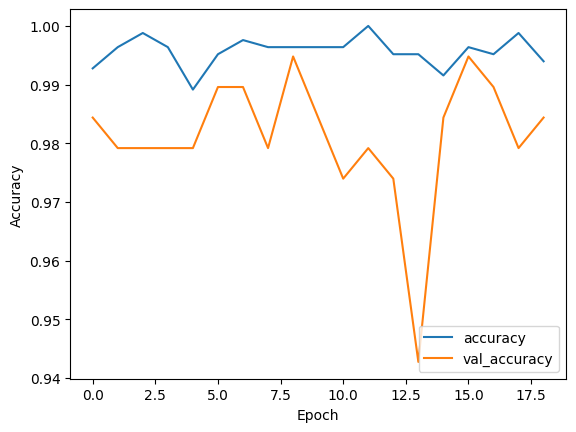

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Testing model

1/1 [==============================] - 3s 3s/step


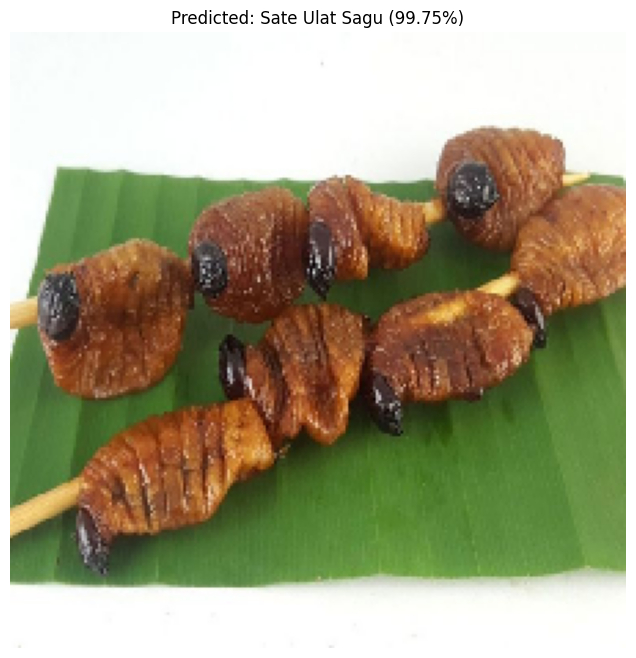

In [ ]:
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Path ke direktori test
test_directory = "/content/drive/MyDrive/DataSetCapstone/test"

# List semua berkas gambar dalam direktori test
all_image_files = []
for root, dirs, files in os.walk(test_directory):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):  # Ubah sesuai dengan ekstensi berkas gambar Anda
            all_image_files.append(os.path.join(root, file))

# Pilih secara acak satu berkas gambar dari list
random_image_path = random.choice(all_image_files)

# Load dan preprocess gambar
img = image.load_img(random_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Melakukan prediksi
predictions = model_TL.predict(img_array)

# Mendapatkan label kelas
class_labels = list(train_data.class_indices.keys())

# Menampilkan gambar dan prediksinya
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')

# Menambahkan label prediksi di atas gambar
predicted_label = class_labels[np.argmax(predictions)]
confidence = np.max(predictions) * 100
plt.title(f'Predicted: {predicted_label} ({confidence:.2f}%)')

plt.show()

Save Model

In [ ]:
from google.colab import files

# Simpan model dalam format .h5
model_TL.save('model.h5')

# Unduh model
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import model_from_json
from google.colab import files

# Simpan arsitektur model dalam format .json
model_json = model_TL.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Unduh model .json
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Konversi model Keras menjadi TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_TL)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Jika Anda menggunakan Google Colab dan ingin mengunduh file .tflite
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Konversi model Keras menjadi TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_TL)
tflite_model = converter.convert()

# Jika Anda menggunakan Google Colab dan ingin mengunduh file .bin
from google.colab import files
files.download('model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>